experimento GA.03 - caixeiro com gasolina infinita
========================================



## Introdução



O problema do caixeiro viajante com gasolina infinita é uma variação do clássico problema do caixeiro viajante, no qual o caixeiro tem à sua disposição uma quantidade infinita de gasolina para percorrer as cidades. Nesse caso, o objetivo é encontrar a rota mais curta que permite ao caixeiro visitar todas as cidades uma vez, retornando à cidade inicial, minimizando a distância total percorrida.

Ao contrário do problema original do caixeiro viajante, onde é necessário levar em consideração a limitação de recursos, como a capacidade do veículo ou o custo da gasolina, o problema do caixeiro viajante com gasolina infinita simplifica esse aspecto, considerando que o caixeiro pode viajar entre as cidades sem restrições.

**Considerações do experimento**: Considere um número $n\geq 7$ de coordenadas $(x,y)$ de cidades e que o caixeiro tenha combustível infinito. Você pode gerar as coordenadas de forma aleatória ou simplesmente usar as coordenadas que desejar. O caixeiro só anda em linha reta e apenas entre duas cidades. O caixeiro começa e termina seu trajeto na mesma cidade e, fora a cidade inicial, ele não visita nenhuma outra cidade mais de uma vez.

## Objetivo



Encontre o caminho de maior distância no problema do caixeiro viajante e mostre ele de forma gráfica.

## Importações



In [1]:
import random
from itertools import permutations
from funcoes import cria_cidades
from funcoes import populacao_inicial_cv as cria_populacao_inicial
from funcoes import funcao_objetivo_pop_cv
from funcoes import funcao_objetivo_cv
from funcoes import selecao_roleta_max as funcao_selecao
from funcoes import cruzamento_ordenado as funcao_cruzamento
from funcoes import mutacao_de_troca as funcao_mutacao
import matplotlib.pyplot as plt

## Códigos e discussão



In [2]:
### CONSTANTES
TAMANHO_POPULACAO = 50
NUMERO_GERACOES = 1000
CHANCE_CRUZAMENTO = 0.5
CHANCE_MUTACAO = 0.05
NUM_COMBATENTES_NO_TORNEIO = 3
NUMERO_CIDADES = 6
CIDADES = cria_cidades(NUMERO_CIDADES)

In [3]:
#Funções locais

def funcao_objetivo_pop(populacao):
    return funcao_objetivo_pop_cv(populacao, CIDADES)

def funcao_objetivo_individuo(individuo):
    return funcao_objetivo_cv(individuo, CIDADES)

Agora, vamos realizar uma busca por algoritmo genético, envolvendo todas as partes já vistas anteriormente

In [4]:
populacao = cria_populacao_inicial(TAMANHO_POPULACAO, CIDADES)

melhor_fitness_ja_visto = -float("inf")

for n in range(NUMERO_GERACOES): 
    
    #Parte da seleção:
    fitness = funcao_objetivo_pop(populacao)
    populacao = funcao_selecao(populacao, fitness)
    
    pais = populacao[0::2] 
    maes = populacao[1::2] 
    
    contador = 0
    
    for pai, mae in zip(pais, maes): 
        if random.random() <= CHANCE_CRUZAMENTO:
            filho1, filho2 = funcao_cruzamento(pai, mae)
            populacao[contador] = filho1
            populacao[contador + 1] = filho2
        
        contador = contador + 2   
        
    for n in range(len(populacao)):
        if random.random() <= CHANCE_MUTACAO:
            individuo = populacao[n]
            populacao[n] = funcao_mutacao(individuo)            
            
    fitness = funcao_objetivo_pop(populacao)
    maior_fitness = max(fitness)
    if maior_fitness > melhor_fitness_ja_visto:        
        posicao = fitness.index(maior_fitness)
        melhor_individuo_ja_visto = populacao[posicao]
        melhor_fitness_ja_visto = maior_fitness

Próximo passo é testar todas as permutações possíveis

In [5]:
melhor_fitness_todos = -float("inf")
for caminho in permutations(list(CIDADES.keys())):
    distancia = funcao_objetivo_individuo(caminho)
    if distancia > melhor_fitness_todos:
        melhor_fitness_todos = distancia
        melhor_resposta_todos = caminho

Resultados:

In [6]:
print()
print("Melhor individuo obtido por algoritmos genéticos:")
print(melhor_individuo_ja_visto, "com distância:", melhor_fitness_ja_visto)

print()
print("Melhor individuo obtido por busca exaustiva:")
print(melhor_resposta_todos, "com distância:", melhor_fitness_todos)


Melhor individuo obtido por algoritmos genéticos:
['Cidade 5', 'Cidade 3', 'Cidade 0', 'Cidade 2', 'Cidade 4', 'Cidade 1'] com distância: 3.324710303963071

Melhor individuo obtido por busca exaustiva:
('Cidade 1', 'Cidade 5', 'Cidade 3', 'Cidade 0', 'Cidade 2', 'Cidade 4') com distância: 3.324710303963071


#### Coordenadas dos pontos da resposta dada pelo Algoritmo Genético:

[(0.7325328297471437, 0.058230600630981955), (0.6681768658197772, 0.45619464840978075), (0.5075606824553255, 0.22485846856829772), (0.5336068609272464, 0.3944958597131071), (0.7928503854480704, 0.037540562806819944), (0.016745135000694633, 0.7339944354452528)]


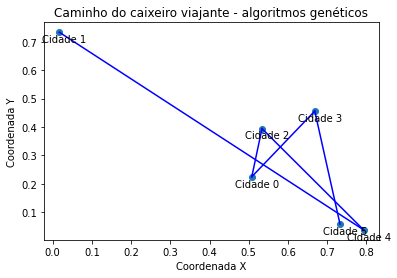

In [7]:
grafo = []
for i in melhor_individuo_ja_visto:
    grafo.append(CIDADES[str(i)])
print(grafo)
lista_pontos = grafo

x = [ponto[0] for ponto in lista_pontos]
y = [ponto[1] for ponto in lista_pontos]
for i, nome in enumerate(melhor_individuo_ja_visto):
    plt.annotate(nome, (x[i], y[i]), textcoords="offset points", xytext=(5,-10), ha='center')

plt.scatter(x, y)

for i in range(len(lista_pontos)-1):
    plt.plot([lista_pontos[i][0], lista_pontos[i+1][0]],
             [lista_pontos[i][1], lista_pontos[i+1][1]], 'b-')

plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('Caminho do caixeiro viajante - algoritmos genéticos')
plt.show()

#### Coordenadas dos pontos da resposta dada pelo Algoritmo de Busca Exaustiva:

[(0.016745135000694633, 0.7339944354452528), (0.7325328297471437, 0.058230600630981955), (0.6681768658197772, 0.45619464840978075), (0.5075606824553255, 0.22485846856829772), (0.5336068609272464, 0.3944958597131071), (0.7928503854480704, 0.037540562806819944)]


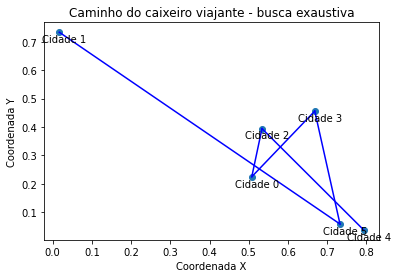

In [9]:
grafo = []
for i in melhor_resposta_todos:
    grafo.append(CIDADES[str(i)])
print(grafo)
lista_pontos = grafo

x = [ponto[0] for ponto in lista_pontos]
y = [ponto[1] for ponto in lista_pontos]
for i, nome in enumerate(melhor_resposta_todos):
    plt.annotate(nome, (x[i], y[i]), textcoords="offset points", xytext=(5,-10), ha='center')

plt.scatter(x, y)

for i in range(len(lista_pontos)-1):
    plt.plot([lista_pontos[i][0], lista_pontos[i+1][0]],
             [lista_pontos[i][1], lista_pontos[i+1][1]], 'b-')

plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('Caminho do caixeiro viajante - busca exaustiva')
plt.show()

## Conclusão



No problema do caixeiro viajante tradicional, o objetivo é encontrar a rota mais curta que permite ao caixeiro visitar todas as cidades uma vez, retornando à cidade inicial. A principal dificuldade desse problema é a sua natureza combinatória, já que o número de permutações possíveis cresce exponencialmente com o aumento do número de cidades. Isso torna a busca pela solução ótima uma tarefa computacionalmente complexa e desafiadora. Já no problema do caixeiro viajante com gasolina infinita, a restrição de recursos é removida. O caixeiro tem uma quantidade infinita de gasolina disponível para percorrer as cidades, eliminando a necessidade de considerar os custos de combustível ou a capacidade do veículo. Essa simplificação torna o problema menos realista em termos práticos, uma vez que na maioria das situações reais, os recursos são limitados. No entanto, a remoção da restrição permite uma abordagem mais direta para a otimização da rota, já que não é necessário levar em conta os fatores de custo e capacidade.

Neste experimento, nota-se que tanto o método de busca exaustiva quanto o método utilizando algoritmo genético funcionam bem, ao que podemos verificar através dos valores exibidos e também pelos grafos que foram plotados. Aqui também retiramos a penalidade que fazia com que o caixeiro procurasse a menor rota possível, alterando os parâmetros de minimização para maximização, de modo que focássemos na maior distância possível, como delimitado nos objetivos prévios.

## Playground

